# Unsupervised Learning for Whisky Taste Segmentation
### Clustering Scottish Single Malts by Flavor to Support Recommendations

#### Project Overview
This project analyzes a dataset of Scottish single malt whiskies from various distilleries across the country. Each whisky is evaluated across 12 sensory attributes (e.g., body, smoky, fruity, floral), rated on a scale from 0 (not significant) to 4 (very significant). The aim was to cluster the whiskies based on their flavor profiles to better support personalized customer recommendations.  

#### Objective: 
To build a clustering system that:
* Identifies groups of whiskies with similar tasting profiles.
* Enables taste-based recommendations (e.g., “If you like smoky whiskies, try these…”).
* Suggests alternatives to customer favorites (e.g., “You liked fruits, here are similar options.”).

#### Methods & Tools:
1. Clustering Algorithms:
    * K-means clustering (partitioning method)

2. Evaluation Techniques:
    * Silhouette score
    * Cluster stability tests with varying cluster numbers

3. Visualization:
    * Radar plots of average flavor profiles per cluster
    * Geographic maps showing distillery locations and cluster distribution


#### My Contribution:
* Data cleaning and preprocessing (ensuring all features were complete and ordinal scale was respected).
* Testing and comparison of clustering approaches.
* Design and implementation of visualizations to summarize and communicate results clearly.
* Interpretation of clusters to support business recommendations.

#### Results
* Identified clear clusters of whiskies based on taste profiles.
* Developed a taste-based recommender system framework.
* Found geographical clustering patterns suggesting regional taste styles.
    Example: Cluster 1 included smoky, peaty whiskies largely from Islay; Cluster 3 included light and floral whiskies from the Highlands.

#### Step 1: Data Import and Preparation
The dataset includes detailed ratings (0–4 scale) of twelve sensory aspects per whisky, alongside geographic information about the distilleries. This data will serve as the foundation for subsequent clustering and visualization tasks designed to support customer advice.

In [1]:
import pandas as pd

df_whisky = pd.read_csv('whisky.csv')
df_whisky.head()

,RowID,Distillery,Tobacco,Smoky,Body,Sweetness,Malty,Nutty,Medicinal,Honey,Winey,Spicy,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,0,2,2,2,2,2,0,2,2,1,2,2,\tPH15 2EB,-3.850199,56.625191
1,2,Aberlour,0,1,3,3,3,2,0,4,2,3,3,2,\tAB38 9PJ,-3.229644,57.467395
2,3,AnCnoc,0,2,1,3,2,2,0,2,0,0,3,2,\tAB5 5LI,-2.785295,57.441751
3,4,Ardbeg,0,4,4,1,2,1,4,0,0,2,1,0,\tPA42 7EB,-6.108503,55.640607
4,5,Ardmore,0,2,2,2,3,2,0,1,1,1,1,1,\tAB54 4NH,-2.743629,57.350557


#### Step 2: Data Preprocessing

* Data description
* Data Cleaning
* Feature Engineering

In [2]:
df_whisky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RowID       86 non-null     int64  
 1   Distillery  86 non-null     object 
 2   Tobacco     86 non-null     int64  
 3   Smoky       86 non-null     int64  
 4   Body        86 non-null     int64  
 5   Sweetness   86 non-null     int64  
 6   Malty       86 non-null     int64  
 7   Nutty       86 non-null     int64  
 8   Medicinal   86 non-null     int64  
 9   Honey       86 non-null     int64  
 10  Winey       86 non-null     int64  
 11  Spicy       86 non-null     int64  
 12  Fruity      86 non-null     int64  
 13  Floral      86 non-null     int64  
 14  Postcode    86 non-null     object 
 15  Latitude    86 non-null     float64
 16  Longitude   86 non-null     float64
dtypes: float64(2), int64(13), object(2)
memory usage: 11.5+ KB


**From the above output, we can conclude that:**  
The data has not missing values, however we have some attributes that are defind as object like 'Distillery', and 'Postcode'

In [3]:
df_whisky.nunique()
# No duplicates distilleries

RowID         86
Distillery    86
Tobacco        2
Smoky          5
Body           5
Sweetness      4
Malty          4
Nutty          5
Medicinal      5
Honey          5
Winey          5
Spicy          4
Fruity         4
Floral         5
Postcode      85
Latitude      77
Longitude     77
dtype: int64

In [4]:
# Brief check for outliers in the data
df_whisky.describe()

,RowID,Tobacco,Smoky,Body,Sweetness,Malty,Nutty,Medicinal,Honey,Winey,Spicy,Fruity,Floral,Latitude,Longitude
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,43.500000,0.116279,1.534884,2.069767,2.290698,1.802326,1.465116,0.546512,1.244186,0.976744,1.383721,1.802326,1.697674,-3.846760,57.096510
std,24.969982,0.322439,0.863613,0.930410,0.717287,0.629094,0.821730,0.990032,0.853175,0.932760,0.784686,0.779438,0.855017,1.073353,0.805907
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.359364,54.858193
25%,22.250000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-4.241500,56.643409
50%,43.500000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,-3.344320,57.443751
75%,64.750000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,-3.192340,57.535823
max,86.000000,1.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,-2.316943,58.967010


In [5]:
df_whisky.columns

Index(['RowID', 'Distillery', 'Tobacco', 'Smoky', 'Body', 'Sweetness', 'Malty',
       'Nutty', 'Medicinal', 'Honey', 'Winey', 'Spicy', 'Fruity', 'Floral',
       'Postcode', 'Latitude', 'Longitude'],
      dtype='object')

#### Step 3: implementing the algorithm

 - K-Means

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Select features which are represented the the twelve differnent aspect of the whiskies
features = ['Tobacco', 'Smoky', 'Body', 'Sweetness', 'Malty', 'Nutty', 'Medicinal', 'Honey', 'Winey', 'Spicy',
             'Fruity', 'Floral']

**Note on Standardization:**  
Before applying K-means clustering, it’s common practice to standardize feature values to ensure equal contribution to distance calculations, especially when features are on different scales or have different variances.

In this case, all sensory attributes are rated on the same 0–4 scale, with relatively similar variance across features. Therefore, standardization was deemed unnecessary. However, in datasets with greater feature variability, standardization remains a recommended step.


In [7]:
#scaler = StandardScaler()
#df_whisky_scaled = scaler.fit_transform(df_whisky[features])

**Using Silhouette score to determine the optimal k (clusters)**  

Silhouette score is a metric that measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).  
Higher silhouette scores indicate better-defined clusters.

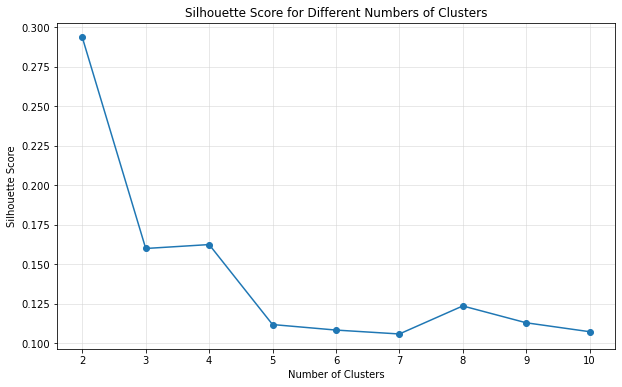

In [8]:
from sklearn.metrics import silhouette_score

# Initialize lists to store silhouette scores
silhouette_scores = []

# Define range of clusters to try
min_clusters = 2
max_clusters = 10

# Iterate over different numbers of clusters
for k in range(min_clusters, max_clusters+1):
    # Fit k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_whisky[features])
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_whisky[features], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')

# Add gridlines and customize their appearance
plt.grid(True, linestyle='-', linewidth=0.5, color='lightgray', zorder=1)

plt.show()


It appears that using two clusters yields a higher Silhouette Coefficient. Since this is an unsupervised approach without any ground truth, it is a sufficient test for determining the ideal number of clusters.

In [9]:
# Choosing the number of clusters based on the Silhouette Coefficient test
k = 2

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
df_whisky['cluster'] = kmeans.fit_predict(df_whisky[features])

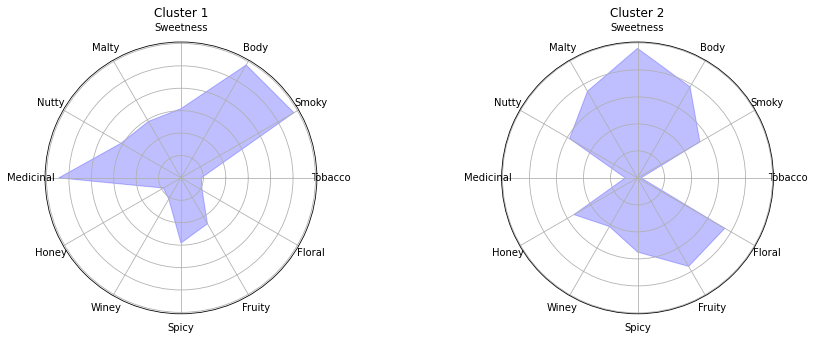

In [10]:
# Visualize results with Radar plot
cluster_centers = kmeans.cluster_centers_ # contains the centroids of each cluster obtained from the k-means clustering algorithm
cluster_labels = kmeans.labels_ # contains the cluster labels assigned to each data point by the k-means algorithm

fig, axes = plt.subplots(1, k, subplot_kw=dict(polar=True), figsize=(15, 5))

for i, ax in enumerate(axes.flatten()):
    values = cluster_centers[i]
    categories = features
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    values = np.concatenate((values,[values[0]]))
    angles += angles[:1]
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(f'Cluster {i+1}')

plt.show()

In [11]:
#pip install cartopy

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


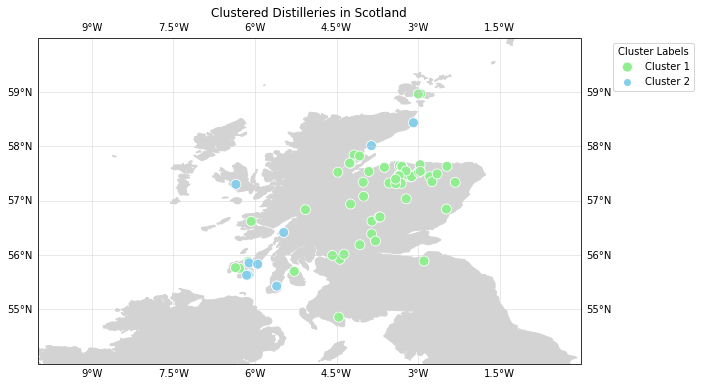

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the extent of United Kingdom in lon-lat coordinates
extent = [-10, 0, 54, 60]  # [min_longitude, max_longitude, min_latitude, max_latitude]

# Create a figure and axis with Cartopy projection
plt.figure(figsize=(20, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)

# Add land feature
ax.add_feature(cfeature.LAND, color='lightgray')

# Define custom palette with sky blue and light green
custom_palette = ['skyblue', 'lightgreen']

# Scatterplot of distilleries on the map
sns.scatterplot(df_whisky['Latitude'], df_whisky['Longitude'], hue=cluster_labels, palette=custom_palette, 
                s=100, legend='full', transform=ccrs.PlateCarree(), ax=ax)

# Title and axis labels
plt.title('Clustered Distilleries in Scotland')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Add gridlines
ax.gridlines(draw_labels=True, linestyle='-', linewidth=0.5, color='lightgray', zorder=1)

# Show legend with custom labels
plt.legend(['Cluster 1', 'Cluster 2'], title='Cluster Labels', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the map
plt.show()

In [13]:
# List of distilleries in Cluster 1
distilleries_cluster1 = df_whisky[df_whisky['cluster'] == 0]['Distillery'].tolist()

# List of distilleries in Cluster 2
distilleries_cluster2 = df_whisky[df_whisky['cluster'] == 1]['Distillery'].tolist()

# Print the lists of distilleries
print("Distilleries in Cluster 1:")
for i in distilleries_cluster1:
    print(i)
print("\nDistilleries in Cluster 2:")
for i in distilleries_cluster2:
    print(i)

Distilleries in Cluster 1:
Ardbeg
Caol Ila
Clynelish
GlenScotia
Isle of Jura
Lagavulin
Laphroig
Oban
OldPulteney
Springbank
Talisker

Distilleries in Cluster 2:
Aberfeldy
Aberlour
AnCnoc
Ardmore
ArranIsleOf
Auchentoshan
Auchroisk
Aultmore
Balblair
Balmenach
Belvenie
BenNevis
Benriach
Benrinnes
Benromach
Bladnoch
BlairAthol
Bowmore
Bruichladdich
Bunnahabhain
Cardhu
Craigallechie
Craigganmore
Dailuaine
Dalmore
Dalwhinnie
Deanston
Dufftown
Edradour
GlenDeveronMacduff
GlenElgin
GlenGarioch
GlenGrant
GlenKeith
GlenMoray
GlenOrd
GlenSpey
Glenallachie
Glendronach
Glendullan
Glenfarclas
Glenfiddich
Glengoyne
Glenkinchie
Glenlivet
Glenlossie
Glenmorangie
Glenrothes
Glenturret
Highland Park
Inchgower
Knochando
Linkwood
Loch Lomond
Longmorn
Macallan
Mannochmore
Miltonduff
Mortlach
OldFettercairn
RoyalBrackla
RoyalLochnagar
Scapa
Speyburn
Speyside
Strathisla
Strathmill
Tamdhu
Tamnavulin
Teaninich
Tobermory
Tomatin
Tomintoul
Tormore
Tullibardine


#### Cluster Characteristics Analysis

**Geographic Patterns:**

As shown in the map, whiskies with lighter, fruitier, and more delicate flavor profiles tend to come from distilleries near the coast, whereas fuller-bodied, smoky whiskies are more commonly found inland.

**Cluster 1 – Robust and Smoky Profile**

* Higher values for: Body, Smoky, Medicinal, along with moderate Spicy, Nutty, Sweet, and Malty notes.
* These whiskies tend to have a bold, peaty character with a fuller mouthfeel, appealing to fans of strong, distinctive flavors.

**Cluster 2 – Light and Delicate Profile**

* Higher values for: Sweetness, Floral, and Fruity.
* Lower values for: Body, Smoky, Malty, Nutty, Winey, and Spicy.
* These whiskies are typically light, fragrant, and approachable, suitable for those who prefer smoother and sweeter drams.

**Key Contrasts**

* **Smokiness & Body:** Cluster 1 whiskies are smoky and full-bodied, while Cluster 2 whiskies are softer and less intense.
* **Fruity, Floral, Sweetness:** These traits are dominant in Cluster 2, making it ideal for lighter palates.
* **Spicy & Medicinal:** Cluster 1 leans more toward medicinal and spicy notes. If a customer seeks a medicinal edge, Cluster 1 is the better fit.

#### Recommendation Guide
**For customers who enjoy smoky, full-bodied whiskies (Cluster 1):**

I recommend distilleries such as:
**Ardbeg, Caol Ila, Clynelish, Lagavulin, Laphroaig, Oban, Old Pulteney, Talisker** --> These offer bold, peaty profiles with complex depth.

**For those who prefer sweet, fruity, and floral whiskies (Cluster 2):**

Try whiskies from:
**Aberfeldy, Aberlour, AnCnoc, Ardmore, Arran Isle of, Auchentoshan, Auchroisk, Aultmore, Balblair, Balmenach, Balvenie, Ben Nevis, Benriach, Benrinnes, Tomatin, Tomintoul, Tormore, Tullibardine** --> These distilleries offer smooth and fragrant profiles ideal for newcomers or lovers of elegant drams.